In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [170]:
def heatmap(table):
    plt.figure(figsize=(10, 10))
    mask = np.triu(np.ones_like(table.corr()))
    heatmap = sns.heatmap(table.corr(), mask=mask, annot=True)
    plt.show()


def plot_dataframe(df, title, x_label, y_label):
    for column in df.columns:
        plt.plot(df.index, df[column], label=column)
    
    # Customize the plot
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [171]:
path = "sifma/US-Agency-Debt-Statistics-SIFMA.xlsx"

AGENCY DEBT

US agency debt markets including issuance, trading and outstanding data. All data is broken out by agency.


ISSUANCE: includes long term issuance ONLY

TRADING VOLUME: Annual and quarterly figures include all FINRA TRACE eligible trades (excludes issues with maturities of one year or less). Monthly and YTD figures are sourced from daily reporting and are subject to 5:15pm cutoff which causes monthly volumes to be understated. Other includes: Farmer Mac, Federal Agricultural Mertgage Corporation, Department of Housing and Urban Deveopement, Federal Farm Credit Banks, Tennesee Valley Authority, Resolution Funding Corporation, Frivate Export Funding, Federal Judiciary Office Building Trust, National Credit Union Administration, and more.

OUTSTANDING: Figures do not include structured products (e.g., student loan ABS from Sallie Mae, MBS from FNMA/FHLMC, etc). Long-term and short-term breakouts are based on contractual maturity on issuance; <1 year debt will not include long-term debt due within a year with the exception of Farmer Mac prior to 2016:Q4.

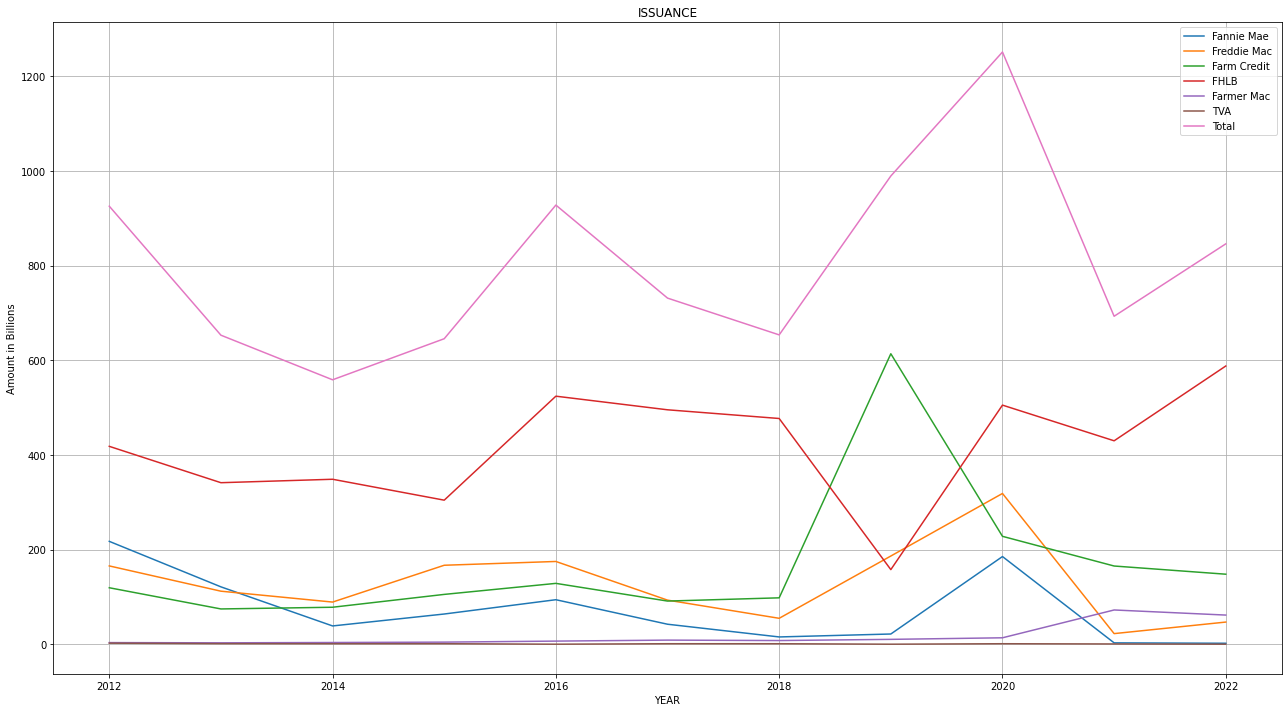

In [176]:
def process(path, tab_name, row_to_skip, column_to_skip):
    df = pd.read_excel(path, sheet_name=tab_name, skiprows=row_to_skip)

    # Set the first row as column names and the first column as the index
    df.columns = df.iloc[0]
    df.index = df.iloc[:, 0]

    # Store the index for later use
    index = df.iloc[:, 0]

    # Remove the first row and the first column, and reset the index
    df = df.iloc[1:].reset_index(drop=True)
    df = df.iloc[:, 1:]

    # Set the index to the values from the stored index
    df.index = index.values[1:]

    # Keep only the first 7 columns
    df = df.iloc[:, :column_to_skip]

    return df


# columns_to_include = ['Fannie Mae', 'Freddie Mac', 'Farm Credit', 'FHLB', 'Farmer Mac', 'TVA', 'Total']
# issuance = pd.read_excel(path, sheet_name="Issuance", skiprows=6)

# issuance.columns = issuance.iloc[0]
# issuance.index = issuance.iloc[:, 0]
# index = issuance.iloc[:, 0]
# issuance = issuance.iloc[1:].reset_index(drop=True)
# issuance = issuance.iloc[:, 1:]
# issuance.index = index.values[1:]
# issuance = issuance.iloc[:,:7]

issuance = process(path, "Issuance", 6,7)
# print(index.values[1:])

# trading_volume = pd.read_excel(path, sheet_name="Trading Volume", skiprows=6)
# outstanding = pd.read_excel(path, sheet_name="Outstanding", skiprows=6)


# display(issuance)

# display(issuance.head(11))
plt.figure(figsize=(18, 10))
plot_dataframe(issuance.head(11),"ISSUANCE","YEAR","Amount in Billions")